In [133]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호(-) 표기

In [134]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

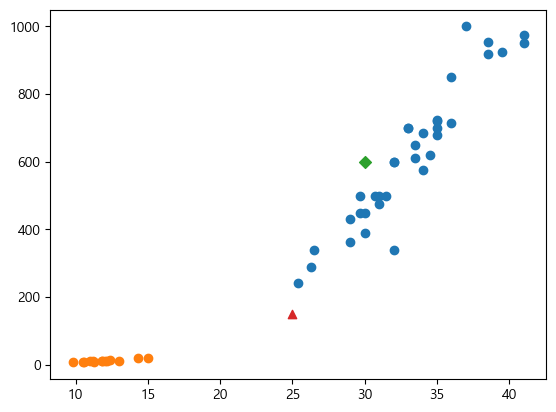

In [152]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30,600, marker='D')
plt.scatter(25,150, marker='^')

In [136]:
len(bream_length) # 35, 도미 데이터
len(smelt_length) # 14, 빙어 데이터

14

도미: 1, 빙어 : 0
results = [1]*35, [0]*14

length 데이터 합치기 bream_length, smelt_length

weight 데이터 합치기 bream_weight, smelt_weight


datas = [length, weight] 합치기, 개수 : 49개

[ [length, weight],[length, weight],[length, weight], ... ,[length, weight] ]

train_input, test_input, train_target, test_target


In [137]:
# 데이터의 전처리 과정을 해보세요.
# length 데이터 합치기 bream_length, smelt_length
length = [bream_length+smelt_length] # mc
length = bream_length+smelt_length 
len(length)
# weight 데이터 합치기 bream_weight, smelt_weight
# weight = [bream_weight+smelt_weight] # mc
weight = bream_weight+smelt_weight
len(length)
results = [1]*35+[0]*14 # 1: 도미, 0: 빙어
results

datas = [ length, weight ]
# zip() : 반복해서 각각의 list 데이터를 1개씩 뽑아서 전달해줌
# datas = [ [l,w] for l,w in zip(length, weight) ]
# datas
datas = [ [l,w,r] for l,w,r in zip(length, weight, results) ]
# datas

df = pd.DataFrame(datas)
# df


In [138]:
# datas와 results 49개를 
# datas : train_input : 35개, test_input : 14개
# results : train_target : 35개, test_target: 14개
# 1, 1, 1, 1, 1, 1, ..., 1 : 35개,
# 0, 0, 0, 0, 0, ...., 0 : 14개

# 파이썬 random 함수 사용해서 49개 중 35개 데이터는 train_input, train_target 
# 14개는 test_imput, test_target 
# 출력하시오. 

In [139]:
# 랜덤 숫자 생성
idx = [i for i in range(49)]
# idx
random.shuffle(idx)
# idx

In [140]:
# 1. 데이터 전처리, pandas 사용
# df.iloc[idx[:35],:]
# len(df.iloc[idx[:35],:]) # 35
train_input = len(df.iloc[idx[:35],:-1])
# df.iloc[idx[35:],:]
# len(df.iloc[idx[35:],:]) # 14
test_input = len(df.iloc[idx[35:],:-1])
train_target = df.iloc[idx[:35], 2]
test_target = df.iloc[idx[35:], 2]


In [141]:
datas[:35]
datas[35:]

[[9.8, 6.7, 0],
 [10.5, 7.5, 0],
 [10.6, 7.0, 0],
 [11.0, 9.7, 0],
 [11.2, 9.8, 0],
 [11.3, 8.7, 0],
 [11.8, 10.0, 0],
 [11.8, 9.9, 0],
 [12.0, 9.8, 0],
 [12.2, 12.2, 0],
 [12.4, 13.4, 0],
 [13.0, 12.2, 0],
 [14.3, 19.7, 0],
 [15.0, 19.9, 0]]

In [142]:
# mc
# datas = []
# for i in range(49):
#     datas = [length[i], weight[i]]
#     # if length[i] <= 35 : 
#     # else : 
#     datas.append()

# datas

In [143]:
# DataFrame을 사용하지 않고, 
# for문을 사용해서 35, 14개를 분리해서 출력하시오.
datas = [ [l,w] for l,w in zip(length, weight) ]
results = [1]*35+[0]*14 # 1: 도미, 0: 빙어

# 파이썬 random 함수 사용해서 전처리
train_input = [ datas[i] for i in idx[:35] ] # 35
test_input = [ datas[i] for i in idx[35:] ] # 14
train_target = [ results[i] for i in idx[:35] ] # 35
test_target = [ results[i] for i in idx[35:14] ] # 14


# train_input = []
# test_input = []
# train_target = []
# test_target = []

# for i in datas:    
#     train_input.append()
#     test_input.append()
#     train_target.append()
#     test_target.append()
    

In [144]:
df_train = pd.DataFrame(train_input)
df_train.head(1)
df_test = pd.DataFrame(test_input)
df_test.head(1)


,0,1
0,38.5,920.0


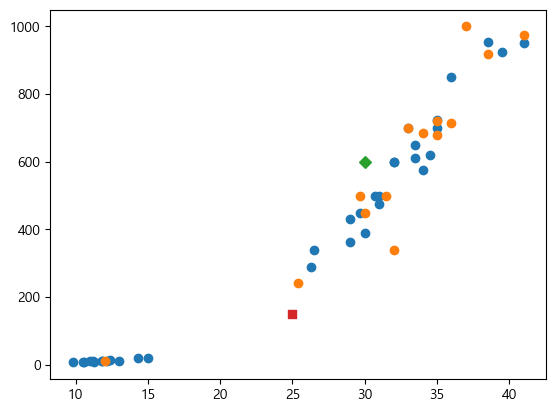

In [150]:
plt.scatter(df_train[0], df_train[1])
plt.scatter(df_test[0], df_test[1])
plt.scatter(30,600, marker='D')
plt.scatter(25,150, marker='^')

In [146]:
# 데이터 학습하기
from sklearn.neighbors import KNeighborsClassifier
# clf = svm.SVC()
clf = KNeighborsClassifier()
clf.fit(train_input, train_target)

# 데이터 예측
pre = clf.predict(test_input)
print("예측 데이터 값 : ", pre)

예측 데이터 값 :  [1 1 1 1 1 0 1 1 1 1 1 1 1 1]


In [157]:
# train_input 몇번째 index 데이터를 사용했는지 알려줌
distances, indexs = clf.kneighbors([[25,150]])

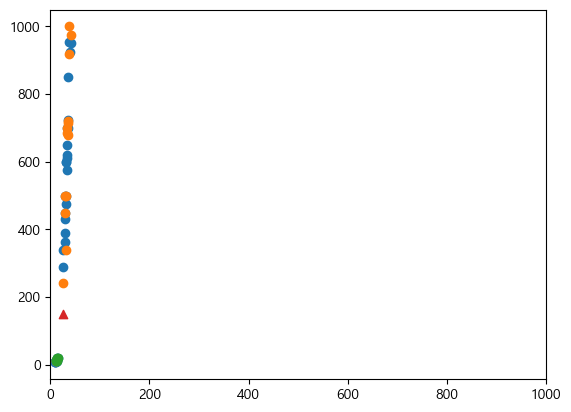

In [163]:
plt.xlim(0,1000)
plt.scatter(df_train[0], df_train[1])
plt.scatter(df_test[0], df_test[1])
plt.scatter(df_train.iloc[indexs[0],0],df_train.iloc[indexs[0],1]) # 도미 1개, 빙어 4개 ==> 빙어로 판단
plt.scatter(25,150, marker='^')

In [147]:
# 정답률
score = clf.score(test_input, test_target)
print("정답률 : ", score)

ValueError: Found input variables with inconsistent numbers of samples: [0, 14]

In [ ]:
# 길이 30, 무게 600인 고기가 무엇인지 판단하시오. [30, 600]

d = [30, 600]
pre = clf.predict([d])
print("예측 데이터 값 : ", pre)

예측 데이터 값 :  [1]


예측 데이터 값 :  [0]


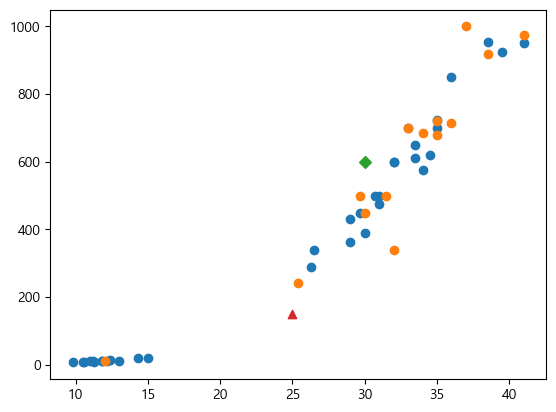

In [153]:
# 길이 25, 무게 150인 고기가 무엇인지 판단하시오.

d2 = [25, 150]
pre = clf.predict([d2])
print("예측 데이터 값 : ",pre) # [0] ==> 빙어


plt.scatter(df_train[0], df_train[1])
plt.scatter(df_test[0], df_test[1])
plt.scatter(30,600, marker='D')
plt.scatter(25,150, marker='^')
# 그래프를 보면 도미(파란색 원)보다 빙어(주황색 원)와 가까운 위치여서 빙어로 나옴.

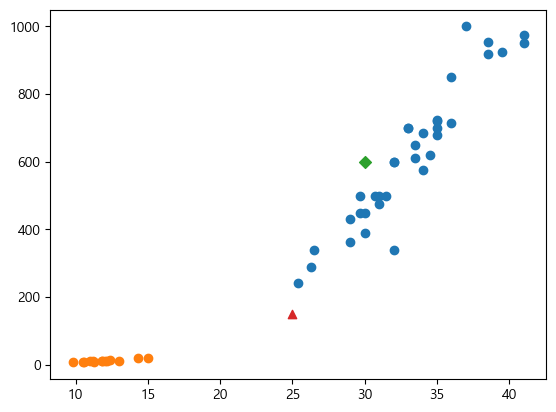

In [154]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30,600, marker='D')
plt.scatter(25,150, marker='^')

In [ ]:
# 평균, 표준편차에 대한 값으로 재분석 -- 방법 1
# 빙어 데이터를 일직선으로 만든 후 -- 방법 2